# UCI Online Retail II dataset - Exploratory Data Aanlysis & RFM Analysis

## Dataset Context
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

<br>

## Dataset Content
Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

<br>

#### Reference
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

## Introduction



### What is RFM 
RFM is a method used for analyzing customer values, which is commonly used in marketing and has received particular attention in retail and prefessional services industries.

***RFM*** stands for:
- **R**ecency (新客) - *When is the last time the customer purchase?*
- **F**requency(常客) - *How often do they purchase?*
- **M**onetay Value (貴客) - *How much do they spend?*

### What insights we can obtain from RFM?

- 
- 

In [2]:
# !pip install wordcloud

## EDA

In [3]:
# import library
import pandas as pd
import numpy as np
import datetime

# Data Viusalization
import matplotlib.pyplot as plt
import seaborn as sns

# self-defined function for EDA
from eda_function import *

In [4]:
df = pd.read_csv("./data/online_retail_II.csv")

In [5]:
df.rename(columns={"Customer ID":"CustomerID"},inplace=True)

In [6]:
summary = df_summary(df)
summary

,dtype,num_missing,num_uniques
Invoice,object,0,53628
StockCode,object,0,5305
Description,object,4382,5698
Quantity,int64,0,1057
InvoiceDate,object,0,47635
Price,float64,0,2807
CustomerID,float64,243007,5942
Country,object,0,43


In [7]:
print("Unique values of each columns: ")
for col in df.columns:
  print(f"{col}: \n {df[col].unique()}\n")


Unique values of each columns: 
Invoice: 
 ['489434' '489435' '489436' ... '581585' '581586' '581587']

StockCode: 
 ['85048' '79323P' '79323W' ... '23609' '23617' '23843']

Description: 
 ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Quantity: 
 [    12     48     24 ...    698  80995 -80995]

InvoiceDate: 
 ['2009-12-01 07:45:00' '2009-12-01 07:46:00' '2009-12-01 09:06:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']

Price: 
 [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]

CustomerID: 
 [13085. 13078. 15362. ... 15520. 13298. 12713.]

Country: 
 ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 '

## Data Cleaning
**remove all N/A and duplicated data**


In [8]:
df_new = df.copy()
df_new.dropna(inplace=True)

In [9]:
df_new.duplicated().sum()

26479

In [10]:
df_new.drop_duplicates(inplace=True)
df_new.duplicated().sum()

0

Our dataset after removing na columns and duplicated data:

In [11]:
df_new.shape

(797885, 8)

In [12]:
summary_new = df_summary(df_new)
summary_new

,dtype,num_missing,num_uniques
Invoice,object,0,44876
StockCode,object,0,4646
Description,object,0,5299
Quantity,int64,0,643
InvoiceDate,object,0,41439
Price,float64,0,1022
CustomerID,float64,0,5942
Country,object,0,41


In [13]:
print("Unique values of each columns: ")
for col in df.columns:
  print(f"{col}: \n {df[col].unique()}\n")


Unique values of each columns: 
Invoice: 
 ['489434' '489435' '489436' ... '581585' '581586' '581587']

StockCode: 
 ['85048' '79323P' '79323W' ... '23609' '23617' '23843']

Description: 
 ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Quantity: 
 [    12     48     24 ...    698  80995 -80995]

InvoiceDate: 
 ['2009-12-01 07:45:00' '2009-12-01 07:46:00' '2009-12-01 09:06:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']

Price: 
 [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]

CustomerID: 
 [13085. 13078. 15362. ... 15520. 13298. 12713.]

Country: 
 ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 '

In [14]:
df_new.Country.value_counts().head(10)

United Kingdom    716115
Germany            17339
EIRE               16014
France             13897
Netherlands         5137
Spain               3754
Belgium             3110
Switzerland         3058
Portugal            2414
Australia           1890
Name: Country, dtype: int64

Different country may have different purchasing preference due to the cultures, ecnonomy, in order to avoid being affected by these factors, we have to focus on a single country here, and since most of the data here are from UK, our customer anaylsis will focus on the UK market first.

In [15]:
df_new[df_new.Quantity < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


The negative in quantity refers to cancellation, the Invoice code of these transition are all starts with the letter "c" which prove the cancellation.

In [16]:
df_new = df_new[(df_new.Quantity > 0) & (df_new.Price > 0)]

In [17]:
df_new.InvoiceDate = pd.to_datetime(df_new.InvoiceDate, format = '%Y-%m-%d')
df_new.InvoiceDate = df_new.InvoiceDate.dt.date

In [18]:
df_new["TotalAmount"] = df_new.Price * df_new.Quantity

In [19]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85


In [20]:
df_new.describe()

,Quantity,Price,CustomerID,TotalAmount
count,779425.000000,779425.000000,779425.000000,779425.000000
mean,13.489370,3.218488,15320.360461,22.291823
std,145.855814,29.676140,1695.692775,227.427075
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13971.000000,4.950000
50%,6.000000,1.950000,15247.000000,12.480000
75%,12.000000,3.750000,16794.000000,19.800000
max,80995.000000,10953.500000,18287.000000,168469.600000


## Recency, Frequency and Monetary Value calculation

In [21]:
# snapshot day
print(f"Data period: \nStart:\t{df_new.InvoiceDate.min()}\nEnd:\t{df_new.InvoiceDate.max()}")
snapshot_date = df_new.InvoiceDate.max() + datetime.timedelta(days = 1)
print(f"\nSnapshot date: {snapshot_date}")

Data period: 
Start:	2009-12-01
End:	2011-12-09

Snapshot date: 2011-12-10


In [22]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85


In [23]:
rfm_df = df_new.groupby("CustomerID").agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
                                      'Invoice':'count',
                                      'TotalAmount': 'sum'})

In [24]:
rfm_df.rename(columns={'InvoiceDate':'Recency', 'Invoice':'Frequency', 'TotalAmount':'MonetaryValue'},inplace = True)

# relation between RFM


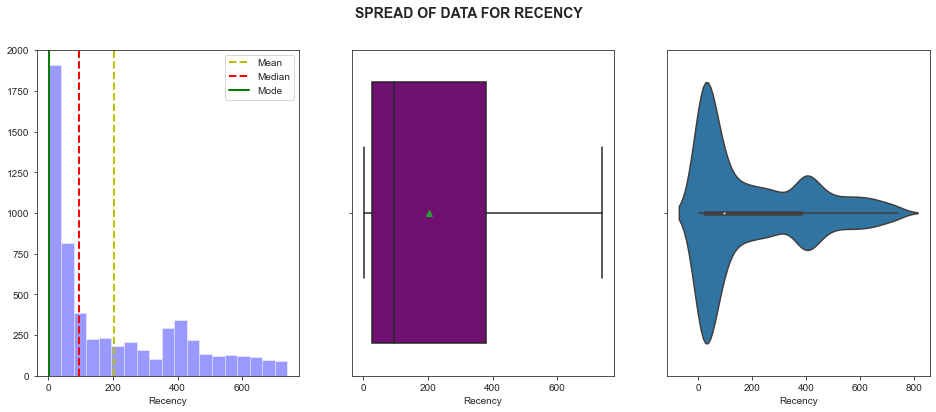

In [25]:
dist_box_violin(rfm_df.Recency)

**Finding;**
- 

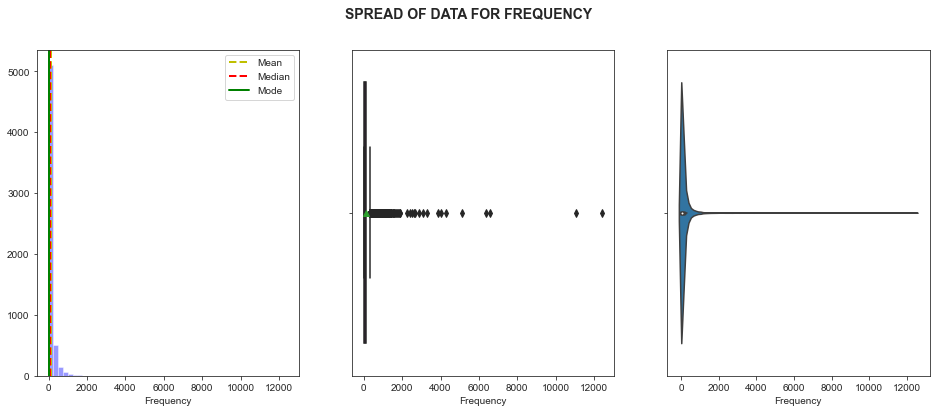

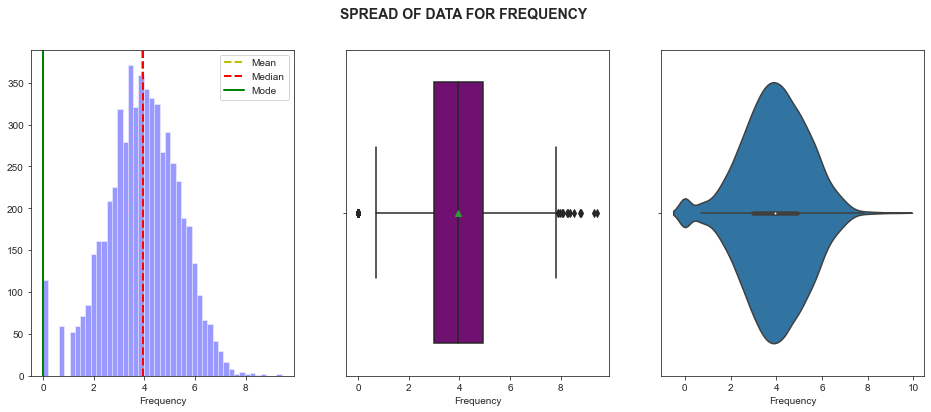

In [26]:
dist_box_violin(rfm_df.Frequency)
dist_box_violin(np.log(rfm_df.Frequency))

**Finding;**
- 

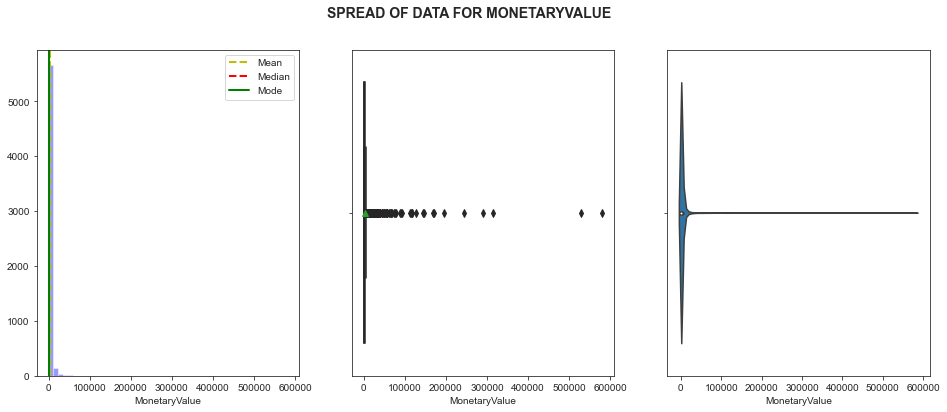

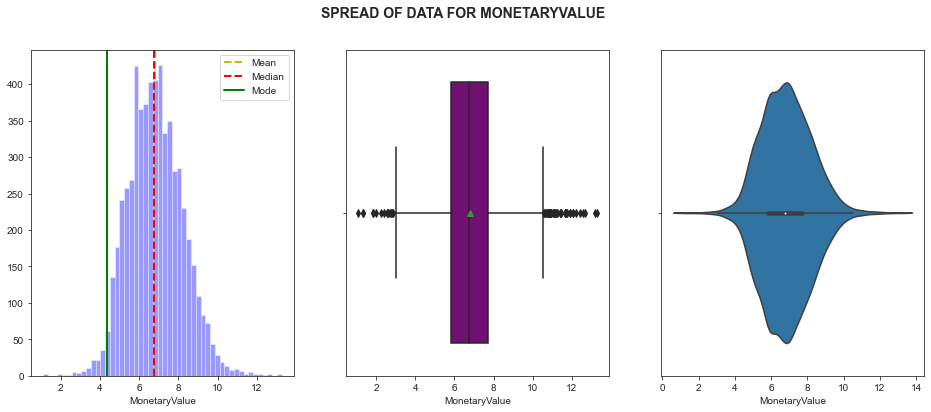

In [27]:
dist_box_violin(rfm_df.MonetaryValue)
dist_box_violin(np.log(rfm_df.MonetaryValue))

**Finding;**
- what are majority look like


In [28]:
# relation between RFM

rfm_df.describe()

,Recency,Frequency,MonetaryValue
count,5878.000000,5878.000000,5878.000000
mean,201.866791,132.600374,2955.904095
std,209.353961,342.190092,14440.852688
min,1.000000,1.000000,2.950000
25%,26.000000,20.000000,342.280000
50%,96.000000,52.000000,867.740000
75%,380.000000,138.000000,2248.305000
max,739.000000,12435.000000,580987.040000


In [29]:
rfm_df

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,34,77556.46
12347.0,3,222,4921.53
12348.0,76,51,2019.40
12349.0,19,175,4428.69
12350.0,311,17,334.40
...,...,...,...
18283.0,4,938,2664.90
18284.0,432,28,461.68
18285.0,661,12,427.00


In [31]:
rfm_df["R"] = pd.qcut(rfm_df["Recency"], q = 4, labels = [4,3,2,1])
rfm_df["F"] =  pd.qcut(rfm_df["Frequency"], q = 4, labels = [4,3,2,1])
rfm_df["M"] = pd.qcut(rfm_df["MonetaryValue"], q = 4, labels = [4,3,2,1])

rfm_df["RFMSegment"] = rfm_df["R"].astype("string") + rfm_df["F"].astype("string") + rfm_df["M"].astype("string")
rfm_df["RFMScore"] = rfm_df["R"].astype("int") + rfm_df["F"].astype("int") + rfm_df["M"].astype("int") 

In [32]:
rfm_df

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12346.0,326,34,77556.46,2,3,1,231,6
12347.0,3,222,4921.53,4,1,1,411,6
12348.0,76,51,2019.40,3,3,2,332,8
12349.0,19,175,4428.69,4,1,1,411,6
12350.0,311,17,334.40,2,4,4,244,10
...,...,...,...,...,...,...,...,...
18283.0,4,938,2664.90,4,1,1,411,6
18284.0,432,28,461.68,1,3,3,133,7
18285.0,661,12,427.00,1,4,3,143,8


## Analyzing RFM Segments

1. Segment the RFM_score and get the final group, 
2. Add the RFM label to the new_df dataframe, 
3. Call out what is the common product (Description) bought by each group.

In [33]:
rfm_df.groupby("RFMScore").agg({"Recency":"mean", "Frequency":"mean", "MonetaryValue":["mean","count"]}).round(2)

Recency Frequency MonetaryValue      
            mean      mean          mean count
RFMScore                                      
3         463.67    290.25       5246.83    24
4         269.01    281.40       5578.85   172
5         177.09    237.71       4461.76   598
6         116.59    337.09       8493.54  1217
7         216.35     85.68       1599.52   980
8         232.40     49.56        874.02   981
9         331.00     23.28        566.43  1071
10        144.82     19.43        341.60   523
11         43.26     13.82        253.58   227
12         15.46     10.05        196.83    85

Customers Segments:
- 10 - 12
- 7 - 9
- 3 - 6

In [49]:
customergroup_df = rfm_df.drop(columns=["Recency","Frequency","MonetaryValue"])
customergroup_df["CustomerGroup"] = np.where((customergroup_df["RFMScore"] < 6), "Gold",
                                     np.where((customergroup_df["RFMScore"] > 8), "Bronze","Sliver"))

In [50]:
customergroup_df

,R,F,M,RFMSegment,RFMScore,CustomerGroup
CustomerID,,,,,,
12346.0,2,3,1,231,6,Sliver
12347.0,4,1,1,411,6,Sliver
12348.0,3,3,2,332,8,Sliver
12349.0,4,1,1,411,6,Sliver
12350.0,2,4,4,244,10,Bronze
...,...,...,...,...,...,...
18283.0,4,1,1,411,6,Sliver
18284.0,1,3,3,133,7,Sliver
18285.0,1,4,3,143,8,Sliver


In [63]:
customergroup_df.to_csv("customergroup_brief.csv",index=False)

In [52]:
customergroup_df.RFMScore.value_counts()

6     1217
9     1071
8      981
7      980
5      598
10     523
11     227
4      172
12      85
3       24
Name: RFMScore, dtype: int64

In [53]:
customergroup_df.CustomerGroup.value_counts()

Sliver    3178
Bronze    1906
Gold       794
Name: CustomerGroup, dtype: int64

## Customer Anaylsis

**Keyword of products in different segments**

In [54]:
final_df = df_new.merge(rfm_df, on="CustomerID")

final_df["CustomerGroup"] = np.where((final_df["RFMScore"] > 9), "Gold",
                                     np.where((final_df["RFMScore"] < 7), "Bronze","Sliver"))

In [55]:
final_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore,CustomerGroup
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,158,84,2433.28,2,2,1,221,5,Bronze
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,158,84,2433.28,2,2,1,221,5,Bronze
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,158,84,2433.28,2,2,1,221,5,Bronze
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,158,84,2433.28,2,2,1,221,5,Bronze
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,158,84,2433.28,2,2,1,221,5,Bronze


In [56]:
final_df.to_csv("customergroup_details.csv",index=False)

In [57]:
from wordcloud import WordCloud

In [58]:
def group_word_cloud(labels):
  """input group labels and return the keyword of products that group purchased
  """
  print(f"These are the keywords of the products purchased by *Group {labels}*:")
  # getting a list of the descriptions in terms of words
  text = final_df[final_df["CustomerGroup"] == labels].Description
  re_text = " ".join(text.astype("string"))
  
  # wordcloud part
  wordcloud = WordCloud(font_path="Lato-Bold.ttf",background_color="white").generate(re_text)
  
  # Display the images
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()  

  wordcloud.to_image(f"{labels}.png")

These are the keywords of the products purchased by *Group Gold*:


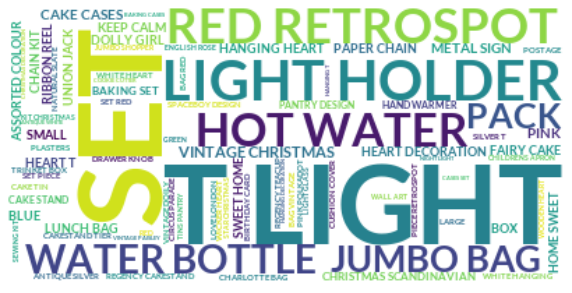

In [59]:
group_word_cloud("Gold")

These are the keywords of the products purchased by *Group Sliver*:


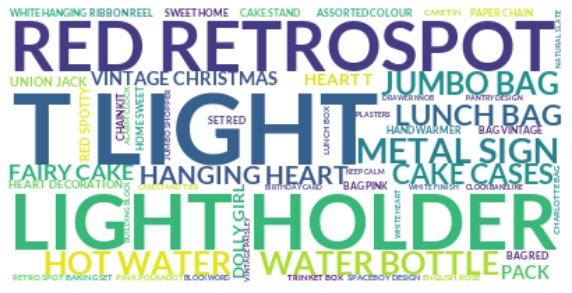

In [60]:
group_word_cloud("Sliver")

These are the keywords of the products purchased by *Group Bronze*:


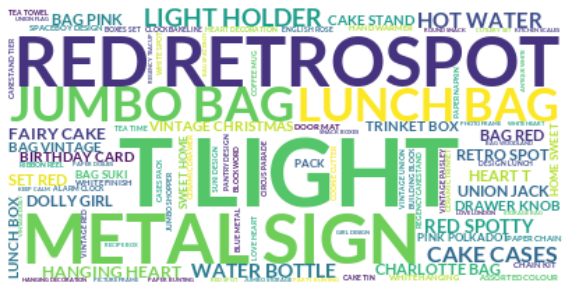

In [61]:
group_word_cloud("Bronze")

**Customers we can focus by RFMSegment**

In [62]:
final_df["RFMSegment"].value_counts()

411    347047
311    109972
211     40814
412     27974
312     22833
322     21067
222     19801
422     17304
212     14747
321      9943
122      9758
421      9634
233      8384
133      8335
223      8156
111      6966
423      6821
333      6296
221      6205
112      6179
323      6130
123      5534
134      5379
144      5182
433      4225
332      3643
413      3562
232      3433
244      2762
234      2514
313      2457
213      2417
132      2132
432      2040
224      1778
124      1769
334      1611
344      1562
121      1408
143      1399
113      1115
243       996
434       900
444       854
331       819
324       779
343       726
424       708
431       703
443       676
231       455
131       353
342       271
242       256
142       195
442       129
241       124
141        80
341        79
441        34
Name: RFMSegment, dtype: Int64